# MACHINE LEARNING

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Load the data
american_politicians_df = pd.read_parquet('../data/american_politicians/parquet/', engine='pyarrow')
# Parse the date column to datetime
american_politicians_df['created_at'] = pd.to_datetime(american_politicians_df['created_at'])
display(american_politicians_df.head())

,author_id,id,created_at,retweet_count,reply_count,like_count,quote_count,impression_count,followers_count,following_count,tweet_count,listed_count
0,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97107,2211,6854,504
1,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97107,2211,6854,504
2,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97095,2211,6854,504
3,914815520842616834,1629913861737283585,2023-02-26 18:38:41+00:00,0,4,19,0,3446,97095,2211,6854,504
4,914815520842616834,1629304017087090689,2023-02-25 02:15:23+00:00,4,22,165,0,17557,97107,2211,6854,504


In [115]:
def plot_scatterplots(df, columns, x_label):
    """Plot scatterplots of the given columns against the x_label.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame to plot.
    columns : list
        The columns to plot.
    x_label : str
        The column to plot on the x-axis.
        """
    nb_rows = len(columns)
    height = 4 * nb_rows
    fig, axes = plt.subplots(nb_rows, 2, figsize=(16, height))
    colors = ['royalblue', 'dodgerblue', 'cornflowerblue', 'skyblue', 'lightsteelblue', 'lightblue', 'lightskyblue', 'powderblue']
    i = 0 

    for column in columns:
        x_label_fmt = x_label.replace('_', ' ').title()
        y_label_fmt = column.replace('_', ' ').title()

        axes = axes.flatten()
        ax1 = axes[i//2*2]
        sns.scatterplot(x=df[x_label], y=df[column], color=colors[i//2], alpha=0.5, ax=ax1)
        #sns.regplot(x=df[x_label], y=df[column], color=colors[i//2], scatter=True, ax=ax1)
        ax1.set_xlabel(x_label_fmt, fontsize=8)
        ax1.set_ylabel(y_label_fmt, fontsize=8)
        ax1.set_title(f'{y_label_fmt} as a Function of {x_label_fmt} in Linear Scale', fontsize=9)
        ax1.set_xscale('linear')
        ax1.set_yscale('linear')
        
        ax2 = axes[i//2*2+(i+1)%2]
        sns.scatterplot(x=df[x_label], y=df[column], color=colors[i//2], alpha=0.5, ax=ax2)
        ax2.set_xlabel(x_label_fmt, fontsize=8)
        ax2.set_ylabel(y_label_fmt, fontsize=8)
        ax2.set_title(f'{y_label_fmt} as a Function of {x_label_fmt} in Log Scale', fontsize=9)
        ax2.set_xscale('log')
        ax2.set_yscale('log')
        
        i += 2
    plt.tight_layout()
    plt.show()

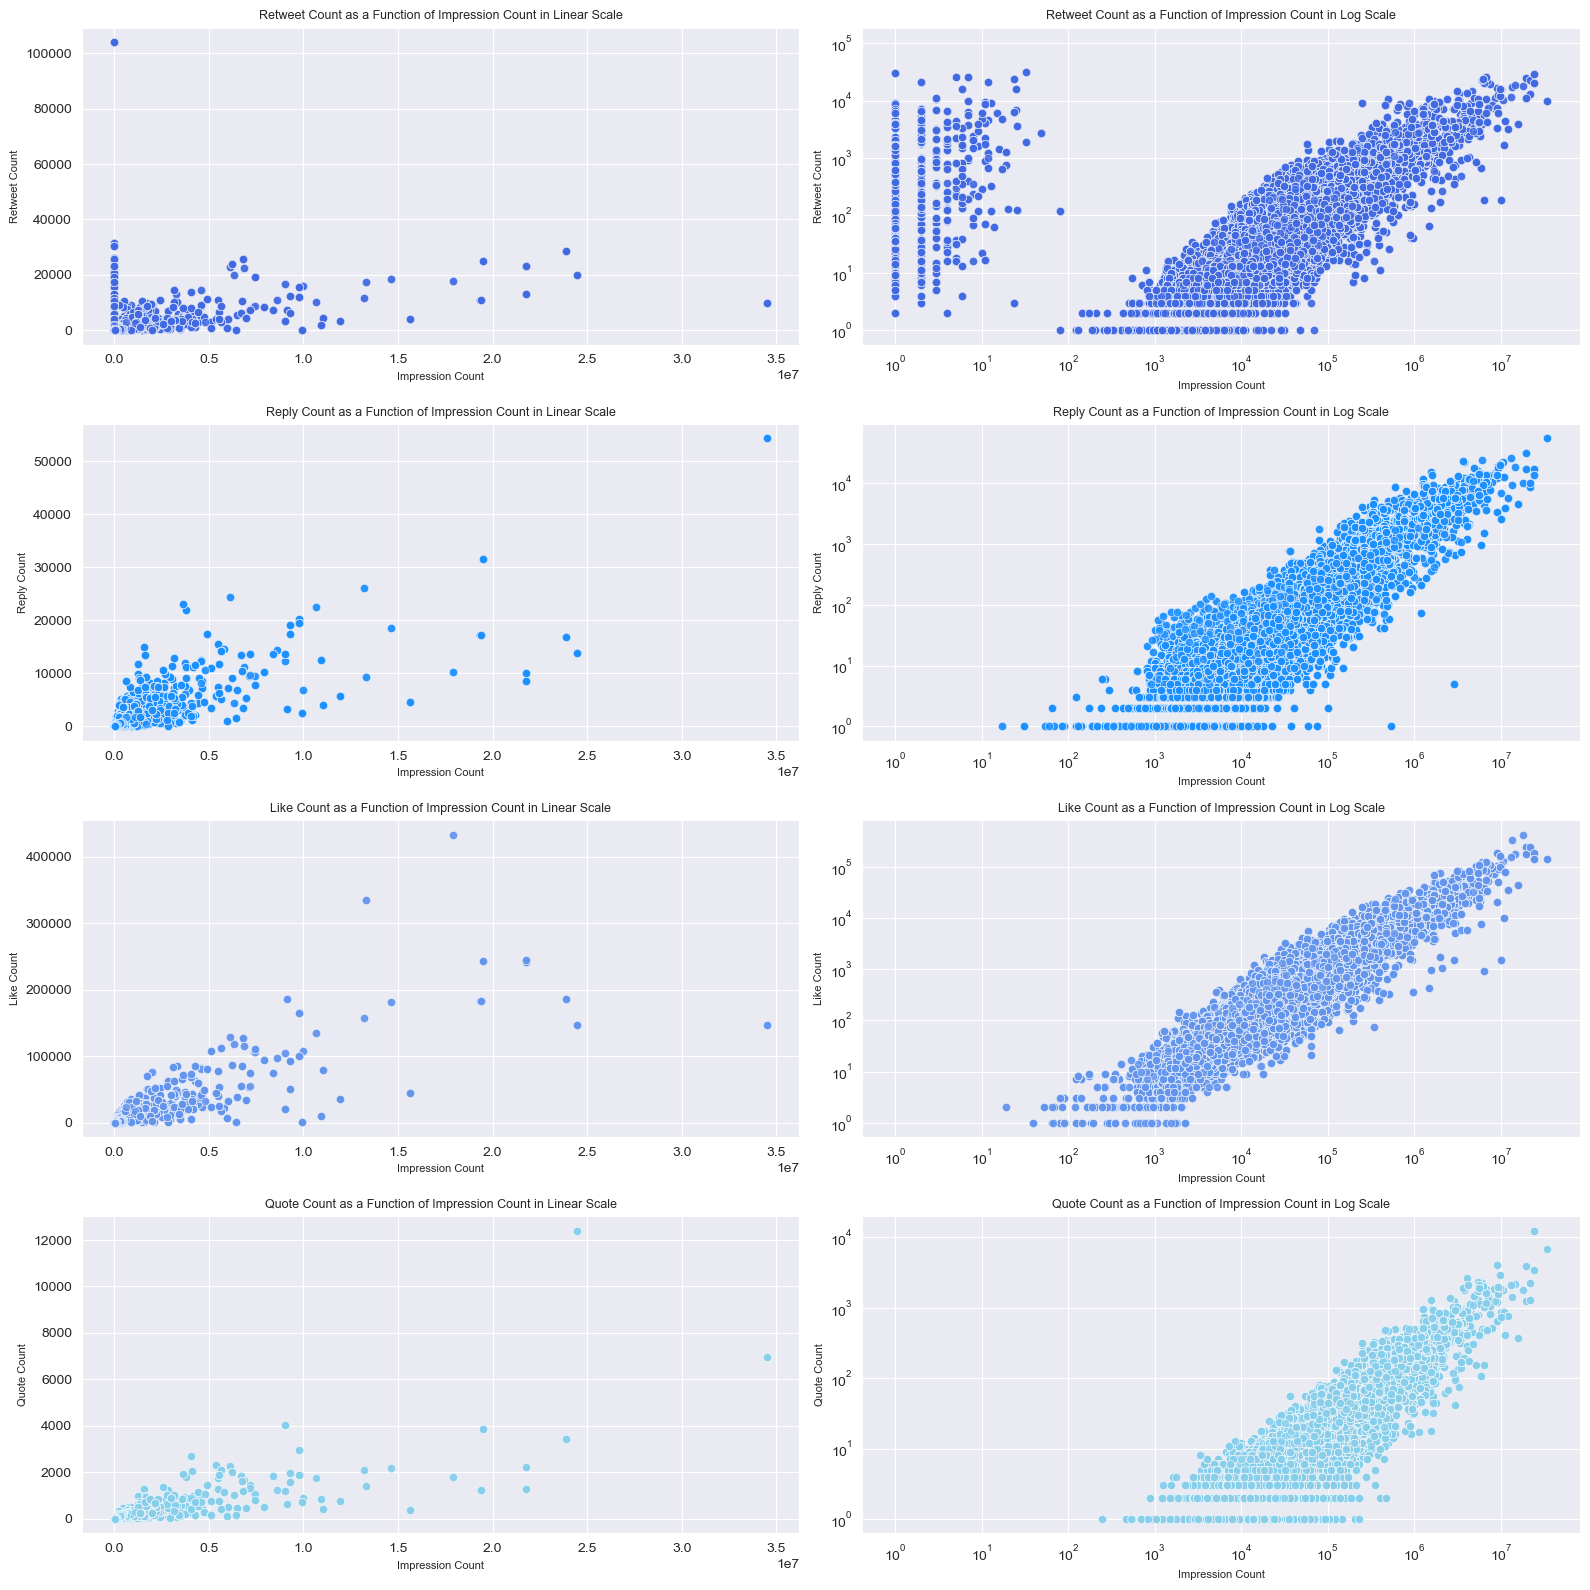

In [116]:
# Plot the scatterplots of the engagement counts against impression count
columns = ['retweet_count', 'reply_count', 'like_count', 'quote_count']
plot_scatterplots(american_politicians_df, columns, 'impression_count')

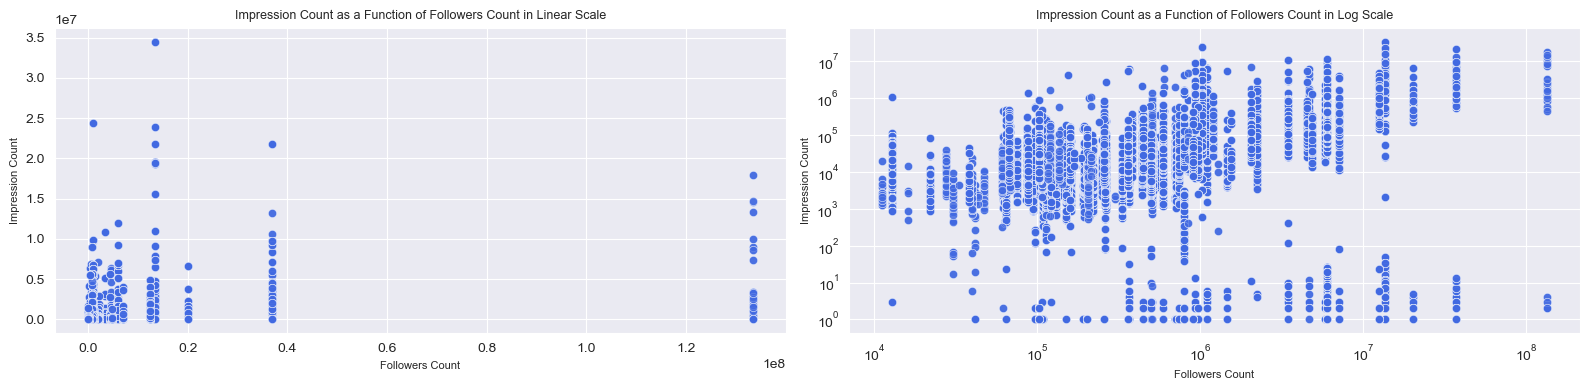

In [117]:
# Plot the scatterplots of the impression counts against follower counts
columns = ['impression_count']
plot_scatterplots(american_politicians_df, columns, 'followers_count')